# Projeto Ciência de Dados - Previsão de Vendas

In [1]:
import pandas as pd

# Importar a base de dados

tabela = pd.read_csv('advertising.csv')
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


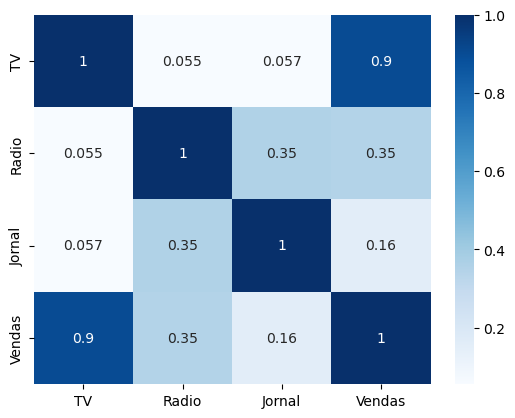

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#criar um grafico 
sns.heatmap(tabela.corr(), cmap='Blues', annot=True)
#exibe o grafico
plt.show()

In [17]:
y= tabela['Vendas']
x= tabela[['TV','Radio','Jornal']]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste= train_test_split(x,y,test_size=0.3, random_state=1)

In [18]:
#importar a IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar a IA
modelo_regressaolinear = LinearRegression()
modelo_arvorededecisao = RandomForestRegressor()

#treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvorededecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [27]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvorededecisao = modelo_arvorededecisao.predict(x_teste)

from sklearn.metrics import r2_score
print (r2_score(y_teste,previsao_regressaolinear))
print (r2_score(y_teste,previsao_arvorededecisao))

0.9071151423684273
0.9623493241928385


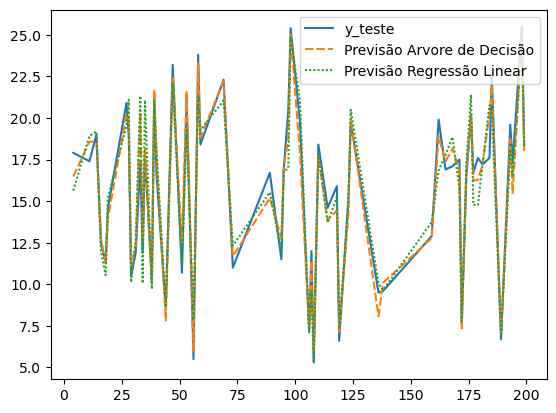

In [34]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsão Arvore de Decisão'] = previsao_arvorededecisao
tabela_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()

In [35]:
nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)



,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [38]:
previsao = modelo_arvorededecisao.predict(nova_tabela)
print(previsao)

[ 7.769  8.643 19.368]
